In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
path = '/home/kai/data/kaggle/talkingdata/data/'
train = pd.read_csv(path + 'train_cleaned.csv')
test = pd.read_csv(path + 'test_cleaned.csv')

In [29]:
test.head(1000)

,ip,app,device,os,channel,year,month,week,day,hour,timestamp,minute,second
0,5744,9,1,3,107,2017,11,45,10,4,1510286400,0,0
1,119901,9,1,3,466,2017,11,45,10,4,1510286400,0,0
2,72287,21,1,19,128,2017,11,45,10,4,1510286400,0,0
3,78477,15,1,13,111,2017,11,45,10,4,1510286400,0,0
4,123080,12,1,13,328,2017,11,45,10,4,1510286400,0,0
5,110769,18,1,13,107,2017,11,45,10,4,1510286400,0,0
6,12540,3,1,1,137,2017,11,45,10,4,1510286400,0,0
7,88637,27,1,19,153,2017,11,45,10,4,1510286400,0,0
8,14932,18,1,10,107,2017,11,45,10,4,1510286400,0,0
9,123701,12,1,53,424,2017,11,45,10,4,1510286400,0,0


# explore time on train and test

In [3]:
#####
# from timestamp, there no overlap between time

print('training')
print(train.timestamp.max() - train.timestamp.min())
print('max: {}'.format(train.timestamp.max()))
print('min: {}'.format(train.timestamp.min()))
print('==========')
print('testing')
print(test.timestamp.max() - test.timestamp.min())
print('max: {}'.format(test.timestamp.max()))
print('min: {}'.format(test.timestamp.min()))

training
264459
max: 1510243200
min: 1509978741
testing
39600
max: 1510326000
min: 1510286400


# explore attribute distribution

In [35]:
import matplotlib.pyplot as plt

In [44]:
threshold = 0.66
cut = int(len(train) * threshold)
front = train['is_attributed'].values[:cut]
rear = train['is_attributed'].values[cut:]
y_front, x_front = np.histogram(front, bins=2) 
y_front = y_front / len(front)
y_rear,x_rear = np.histogram(rear, bins=2) 
y_rear =y_rear / len(rear)

In [45]:
print('Below is the historical part, ratio is {}'.format(threshold))
print(y_front)
print()
print('Below is the training part, ratio is {}'.format(1-threshold))
print(y_rear)

Below is the historical part, ratio is 0.66
[ 0.99751356  0.00248644]

Below is the training part, ratio is 0.33999999999999997
[ 0.9975598  0.0024402]


# explore IP Distribution

training
364777
max: 364778
min: 1
testing
126413
max: 126413
min: 0


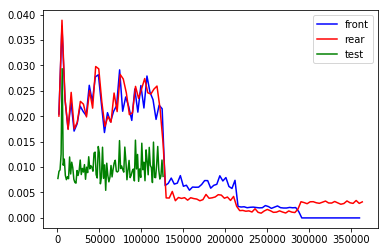

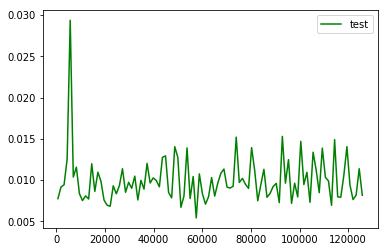

In [57]:
#####
# from timestamp, there no overlap between time
col = 'ip'
print('training')
print(train[col].max() - train[col].min())
print('max: {}'.format(train[col].max()))
print('min: {}'.format(train[col].min()))
print('==========')
print('testing')
print(test[col].max() - test[col].min())
print('max: {}'.format(test[col].max()))
print('min: {}'.format(test[col].min()))

######################################

### evaluate ip
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result

BIN = 100
front = train[col].values[:cut]
rear = train[col].values[cut:]
y_front, x_front = np.histogram(front, bins=BIN) 
y_front = y_front / len(front)
x_front = edge_to_mean(x_front)
y_rear,x_rear = np.histogram(rear, bins=BIN) 
y_rear =y_rear / len(rear)
x_rear = edge_to_mean(x_rear)

t_test = test[col].values
y_test, x_test = np.histogram(t_test, bins=BIN) 
y_test = y_test / len(t_test)
x_test = edge_to_mean(x_test)

plt.plot(x_front, y_front, c='b', label='front')
plt.plot(x_rear, y_rear, c='r', label='rear')
plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

# explore app

training
768
max: 768
min: 0
testing
521
max: 521
min: 0


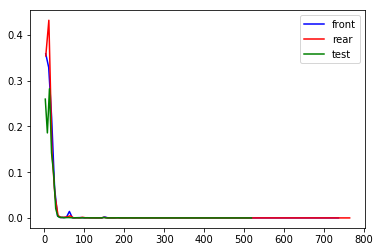

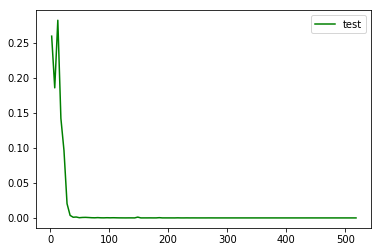

In [56]:
#####
# from timestamp, there no overlap between time
col = 'app'
print('training')
print(train[col].max() - train[col].min())
print('max: {}'.format(train[col].max()))
print('min: {}'.format(train[col].min()))
print('==========')
print('testing')
print(test[col].max() - test[col].min())
print('max: {}'.format(test[col].max()))
print('min: {}'.format(test[col].min()))

######################################

### evaluate ip
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result

BIN = 100
front = train[col].values[:cut]
rear = train[col].values[cut:]
y_front, x_front = np.histogram(front, bins=BIN) 
y_front = y_front / len(front)
x_front = edge_to_mean(x_front)
y_rear,x_rear = np.histogram(rear, bins=BIN) 
y_rear =y_rear / len(rear)
x_rear = edge_to_mean(x_rear)

t_test = test[col].values
y_test, x_test = np.histogram(t_test, bins=BIN) 
y_test = y_test / len(t_test)
x_test = edge_to_mean(x_test)

plt.plot(x_front, y_front, c='b', label='front')
plt.plot(x_rear, y_rear, c='r', label='rear')
plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

# explore device

training
4227
max: 4227
min: 0
testing
3031
max: 3031
min: 0


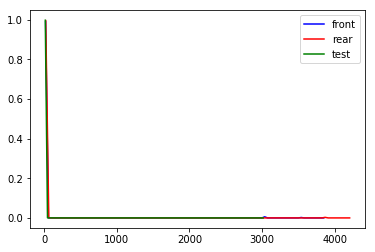

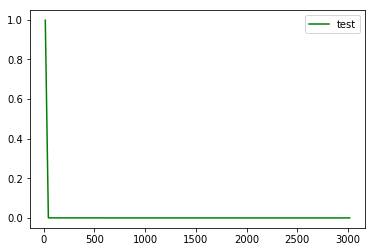

In [58]:
#####
# from timestamp, there no overlap between time
col = 'device'
print('training')
print(train[col].max() - train[col].min())
print('max: {}'.format(train[col].max()))
print('min: {}'.format(train[col].min()))
print('==========')
print('testing')
print(test[col].max() - test[col].min())
print('max: {}'.format(test[col].max()))
print('min: {}'.format(test[col].min()))

######################################

### evaluate ip
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result

BIN = 100
front = train[col].values[:cut]
rear = train[col].values[cut:]
y_front, x_front = np.histogram(front, bins=BIN) 
y_front = y_front / len(front)
x_front = edge_to_mean(x_front)
y_rear,x_rear = np.histogram(rear, bins=BIN) 
y_rear =y_rear / len(rear)
x_rear = edge_to_mean(x_rear)

t_test = test[col].values
y_test, x_test = np.histogram(t_test, bins=BIN) 
y_test = y_test / len(t_test)
x_test = edge_to_mean(x_test)

plt.plot(x_front, y_front, c='b', label='front')
plt.plot(x_rear, y_rear, c='r', label='rear')
plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

# explore os

training
956
max: 956
min: 0
testing
604
max: 604
min: 0


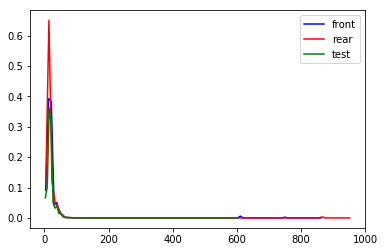

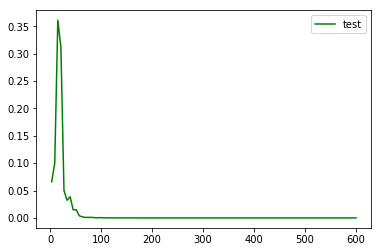

In [59]:
#####
# from timestamp, there no overlap between time
col = 'os'
print('training')
print(train[col].max() - train[col].min())
print('max: {}'.format(train[col].max()))
print('min: {}'.format(train[col].min()))
print('==========')
print('testing')
print(test[col].max() - test[col].min())
print('max: {}'.format(test[col].max()))
print('min: {}'.format(test[col].min()))

######################################

### evaluate ip
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result

BIN = 100
front = train[col].values[:cut]
rear = train[col].values[cut:]
y_front, x_front = np.histogram(front, bins=BIN) 
y_front = y_front / len(front)
x_front = edge_to_mean(x_front)
y_rear,x_rear = np.histogram(rear, bins=BIN) 
y_rear =y_rear / len(rear)
x_rear = edge_to_mean(x_rear)

t_test = test[col].values
y_test, x_test = np.histogram(t_test, bins=BIN) 
y_test = y_test / len(t_test)
x_test = edge_to_mean(x_test)

plt.plot(x_front, y_front, c='b', label='front')
plt.plot(x_rear, y_rear, c='r', label='rear')
plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

# explore channel

training
500
max: 500
min: 0
testing
498
max: 498
min: 0


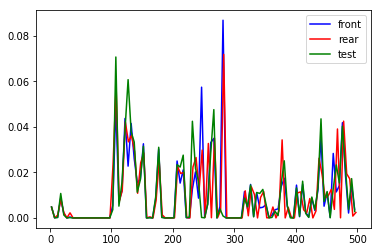

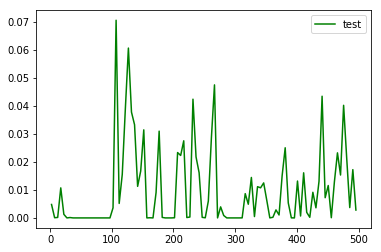

In [60]:
#####
# from timestamp, there no overlap between time
col = 'channel'
print('training')
print(train[col].max() - train[col].min())
print('max: {}'.format(train[col].max()))
print('min: {}'.format(train[col].min()))
print('==========')
print('testing')
print(test[col].max() - test[col].min())
print('max: {}'.format(test[col].max()))
print('min: {}'.format(test[col].min()))

######################################

### evaluate ip
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result

BIN = 100
front = train[col].values[:cut]
rear = train[col].values[cut:]
y_front, x_front = np.histogram(front, bins=BIN) 
y_front = y_front / len(front)
x_front = edge_to_mean(x_front)
y_rear,x_rear = np.histogram(rear, bins=BIN) 
y_rear =y_rear / len(rear)
x_rear = edge_to_mean(x_rear)

t_test = test[col].values
y_test, x_test = np.histogram(t_test, bins=BIN) 
y_test = y_test / len(t_test)
x_test = edge_to_mean(x_test)

plt.plot(x_front, y_front, c='b', label='front')
plt.plot(x_rear, y_rear, c='r', label='rear')
plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_test, y_test, c='g', label='test')
plt.legend(loc='upper right')
plt.show()